<a href="https://colab.research.google.com/github/DonRoboto/CursoMOO/blob/main/MOO_WeightedSum_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import numpy as np
import random
from sympy import *
import matplotlib.pyplot as plt


#random.seed(1000)
alpha = 0.01

ro = 0.8
c = 0.1

#pesos = [i/100 for i in range(0, 101)]
pesos = [i/100 for i in range(0, 101)]


In [6]:
x0 = Symbol('x0')
x1 = Symbol('x1')

#Function Binh and Korn
#f1 = 4*x0**2 + 4*x1**2
#f2 = (x0-5)**2 + (x1-5)**2

#g1 = (x0 - 5)**2 + x1**2
#g2 = (x0 - 8)**2 + (x1 + 3)**2


#Function Test
#f1 = x0**2 - x1
#f2 = -0.5*x0 - x1 - 1

#g1 = 6.5 - x0/6 - x1
#g2 = 7.5 - 0.5*x0 - x1
#g3 = 30 - 0.5*x0 - x1


#Tarea 1
f1 = (x0-1)**2 + (x1-1)**4
f2 = (x0+1)**2 + (x1+1)**2

#g1 = (x0 - 5)**2 + x1**2
#g2 = (x0 - 8)**2 + (x1 + 3)**2


In [7]:
def Gradient(fx, X):
  return np.array( [ [fx.diff(x0).subs( [(x0, float(X[0])), (x1, float(X[1]))]  )], [fx.diff(x1).subs( [(x0, float(X[0])), (x1, float(X[1]))]  ) ] ] )  

def Direction(fx, X):  
  dy = -1 * Gradient(fx, X)
  return dy

def Step_Size(fx, X, alpha, ro, c):
  counter = 0
  origen_0 = fx.subs([(x0, float(X[0])), (x1, float(X[1]))]).doit()
  f_k = origen_0
  
  pk = Direction(fx, X)
  
  g = Gradient(fx, X)

  while True:
    dato1 = X  + (alpha * pk)
    destino = fx.subs([(x0, float(dato1[0])), (x1, float(dato1[1]))]).doit()

    dato3 = (c * alpha) * np.dot(g.T, pk)
    penal_0 = dato3[0,0]

    f_n = round(float(destino), 6)
    penalty = round(float(penal_0), 6)

    if (f_n <= f_k + penalty) or (counter>100):
      return alpha

    alpha = round(ro * alpha, 6)
    counter = counter + 1


def Restriction(X):
  r = False
  r1 = g1.subs([ (x0, float(X[0])), (x1, float(X[1])) ] ).doit()
  r2 = g2.subs([ (x0, float(X[0])), (x1, float(X[1])) ] ).doit()
  
  if (r1>25) or (r2<7.7):
    r = True

  return r


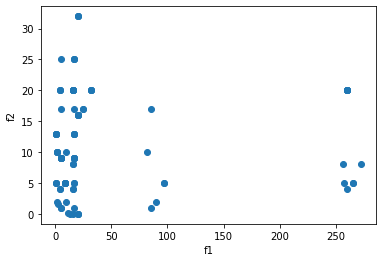

In [11]:
import scipy, pylab
ax = pylab.subplot(111)

prev_val = 1000000
epsilon = 0.00001
counter=0
max_value=1000

graph1=[]
graph2=[]


for p in pesos:
#for i in range(10):
  xv0 = random.randint(-3, 3)
  xv1 = random.randint(-3, 3)

  X = np.array([[xv0], [xv1]])

  w1 = round(p, 2)
  w2 = round(1-p, 2)

  func = w1 * f1 + w2 * f2
  
  while True:
    pk = Direction(func, X)

    alpha = Step_Size(func, X, alpha, ro, c)

    Xn = X + (alpha * pk) 
    actual_val = func.subs([ (x0, float(Xn[0])), (x1, float(Xn[1])) ] )

    if (round(abs(actual_val - prev_val), 6)<epsilon) or (counter>=max_value):
      break

    X = Xn
    prev_val = actual_val
    counter = counter + 1

  #re1, re2 = Restriction(X)
  #if (re1>25 or re2<7.7):
  #  counter = counter - 1
  #  break
  
#  if Restriction(X):
#    counter = counter - 1
#    break

  f_1 = f1.subs([(x0, float(X[0])), (x1, float(X[1]))]).doit()
  f_2 = f2.subs([(x0, float(X[0])), (x1, float(X[1]))]).doit()

  graph1.append(f_1)
  graph2.append(f_2)

  #print(p)
  #ax.scatter(f_1, f_2)
  #ax.scatter(scipy.randn(100), scipy.randn(100) )


ax.set_xlabel('f1')
ax.set_ylabel('f2')

ax.figure.show()
plt.scatter(graph1, graph2)
plt.show()

